In [1]:
import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 200
# batch_size = 64
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Flatten,Dense

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(100, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 117s 6ms/step - loss: 1.4738 - acc: 0.4968 - val_loss: 0.6983 - val_acc: 0.4938
Epoch 2/10
20000/20000 [==============================] - 118s 6ms/step - loss: 0.6938 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/10
20000/20000 [==============================] - 125s 6ms/step - loss: 0.6932 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 5/10
20000/20000 [==============================] - 114s 6ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 6/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - va

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          3104      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
Total params: 648,484
Trainable params: 648,484
Non-trainable params: 0
_________________________________________________________________


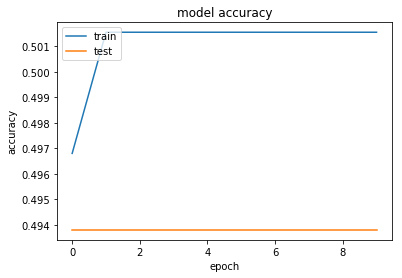

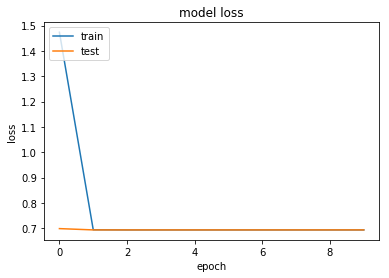

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()